In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.scale as scale
import numpy as np
import math
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import MaxNLocator
from rdkit.Chem import Draw
import rdkit.Chem as Chem
%matplotlib inline

In [4]:
file = r'D:\Project_Sugar_Removal\GlycosylationStatistics_git\GlycosylationStatisticsTest_Output\coconut_stats_review_data_sugars_test\SRUSugars.csv'
sru_positive_df = pd.read_csv(file, header=0, sep=';')
sru_positive_df = sru_positive_df[sru_positive_df.Frequency > 9]
print(sru_positive_df)

                                                   ID  \
0                                                 115   
1                                             263_264   
2                         111_136_158_165_265_293_294   
3   47_53_49_57_68_71_100_106_129_131_176_184_187_...   
4                                             311_313   
5   46_62_135_140_157_125_170_194_198_197_209_215_...   
6                                                 200   
7                                                 291   
8   18_104_156_144_163_160_161_162_210_211_277_286...   
9                                              24_173   
10                                             88_164   
11                   5_32_153_189_260_234_326_320_316   
12                      64_90_122_142_192_195_199_186   
13                                                193   
14                                     77_108_268_266   
15                                              21_22   
16                       78_73_

In [5]:
file = r'D:\Project_Sugar_Removal\GlycosylationStatistics_git\GlycosylationStatisticsTest_Output\coconut_stats_review_data_sugars_test\NonSRUSugars.csv'
sru_negative_df = pd.read_csv(file, header=0, sep=';')
#TODO: this value is completely arbitrary, remove it
#add_value=sru_negative_df.ID[45]
sru_negative_df = sru_negative_df[sru_negative_df.Frequency > 9]
#sru_negative_df = sru_negative_df.append({'ID':add_value, 'Frequency':0}, ignore_index=True)
print(sru_negative_df)

                                         ID                          SMILES  \
0                                   261_262                    OC1OCC(O)CC1   
1                                       220                 OC1OC(C)CC(O)C1   
2   44_48_51_54_56_58_98_97_169_205_308_309                 OC1OC(C)C(O)CC1   
3                          60_63_81_114_203                 OC1OC(C)C(N)CC1   
4                                    95_138                 OC1OCC(N)C(O)C1   
5                            91_141_212_213              OC1OC(C)C(N)C(O)C1   
6                                        40               OCC1OCC(N)C(O)C1O   
7                                        14               OCC1OC(O)C(N)CC1O   
8                                        99                 OC1OC(C)CC(N)C1   
9                                       116                 OC1OCC(O)C(N)C1   
10            45_59_67_66_69_70_124_300_306              OC1OC(C)C(O)C(N)C1   
11                                       41         

In [6]:
if len(sru_negative_df) > len(sru_positive_df):
    for i in range(0, len(sru_negative_df)-len(sru_positive_df)):
        sru_positive_df = sru_positive_df.append({'ID':"", 'SMILES':"",'Frequency':0}, ignore_index=True)
    print(sru_positive_df)
if len(sru_positive_df) > len(sru_negative_df):
    for i in range(0, len(sru_positive_df)-len(sru_negative_df)):
        sru_negative_df = sru_negative_df.append({'ID':"", 'SMILES':"",'Frequency':0}, ignore_index=True)
    print(sru_negative_df)

                                         ID                          SMILES  \
0                                   261_262                    OC1OCC(O)CC1   
1                                       220                 OC1OC(C)CC(O)C1   
2   44_48_51_54_56_58_98_97_169_205_308_309                 OC1OC(C)C(O)CC1   
3                          60_63_81_114_203                 OC1OC(C)C(N)CC1   
4                                    95_138                 OC1OCC(N)C(O)C1   
5                            91_141_212_213              OC1OC(C)C(N)C(O)C1   
6                                        40               OCC1OCC(N)C(O)C1O   
7                                        14               OCC1OC(O)C(N)CC1O   
8                                        99                 OC1OC(C)CC(N)C1   
9                                       116                 OC1OCC(O)C(N)C1   
10            45_59_67_66_69_70_124_300_306              OC1OC(C)C(O)C(N)C1   
11                                       41         

In [7]:
for entry in sru_negative_df.itertuples():
    identifier = entry.ID
    single_ids = identifier.split('_')
    if len(single_ids) > 2:
        #id = single_ids[0] + '_' + single_ids[1] + "..."
        sru_negative_df['ID'] = sru_negative_df['ID'].replace([identifier],single_ids[0] + '_' + single_ids[1] + "...")
        #print(identifier)
print(sru_negative_df)

            ID                          SMILES  Frequency
0      261_262                    OC1OCC(O)CC1      49428
1          220                 OC1OC(C)CC(O)C1      47569
2     44_48...                 OC1OC(C)C(O)CC1      46668
3     60_63...                 OC1OC(C)C(N)CC1       1921
4       95_138                 OC1OCC(N)C(O)C1       1731
5    91_141...              OC1OC(C)C(N)C(O)C1       1703
6           40               OCC1OCC(N)C(O)C1O       1627
7           14               OCC1OC(O)C(N)CC1O       1513
8           99                 OC1OC(C)CC(N)C1       1226
9          116                 OC1OCC(O)C(N)C1        994
10    45_59...              OC1OC(C)C(O)C(N)C1        892
11          41                OC1OC(C)C(N)CC1N        739
12         295             OC1OC(C)C(N)C(O)C1N        734
13         177                OC1OC(C)CC(N)C1O        635
14         1_2                  OC1OC(CN)CCC1N        191
15   65_109...           OC1OC(C)C(O)C(N)(C)C1        120
16         246

In [8]:
for entry in sru_positive_df.itertuples():
    identifier = entry.ID
    single_ids = identifier.split('_')
    if len(single_ids) > 2:
        #id = single_ids[0] + '_' + single_ids[1] + "..."
        sru_positive_df['ID'] = sru_positive_df['ID'].replace([identifier],single_ids[0] + '_' + single_ids[1] + "...")
        #print(identifier)
print(sru_positive_df)

            ID                         SMILES  Frequency
0          115                OC1OCC(O)C(O)C1      47825
1      263_264                OC1COC(O)C(O)C1      46074
2   111_136...               OC1OCC(O)C(O)C1O      45374
3     47_53...             OC1OC(C)C(O)C(O)C1      45328
4      311_313               OC1OC(C)C(O)CC1O      43500
5     46_62...            OC1OC(C)C(O)C(O)C1O      42905
6          200              OCC1OC(O)CC(O)C1O      39745
7          291            OCC1OC(O)C(O)C(O)C1      39109
8    18_104...           OCC1OC(O)C(O)C(O)C1O      39023
9       24_173               OC1OCC(O)C(O)C1N       1592
10      88_164            OC1OC(C)C(O)C(O)C1N       1564
11     5_32...           OCC1OC(O)C(N)C(O)C1O       1492
12    64_90...          OC1OC(C)C(O)C(O)(C)C1       1052
13         193         OC1OC(C)(C)C(O)C(O)C1O        789
14   77_108...         OC1OC(C)C(O)C(O)(C)C1O        598
15       21_22               OC1OCC(O)C(N)C1O        502
16    78_73...            OC1OC

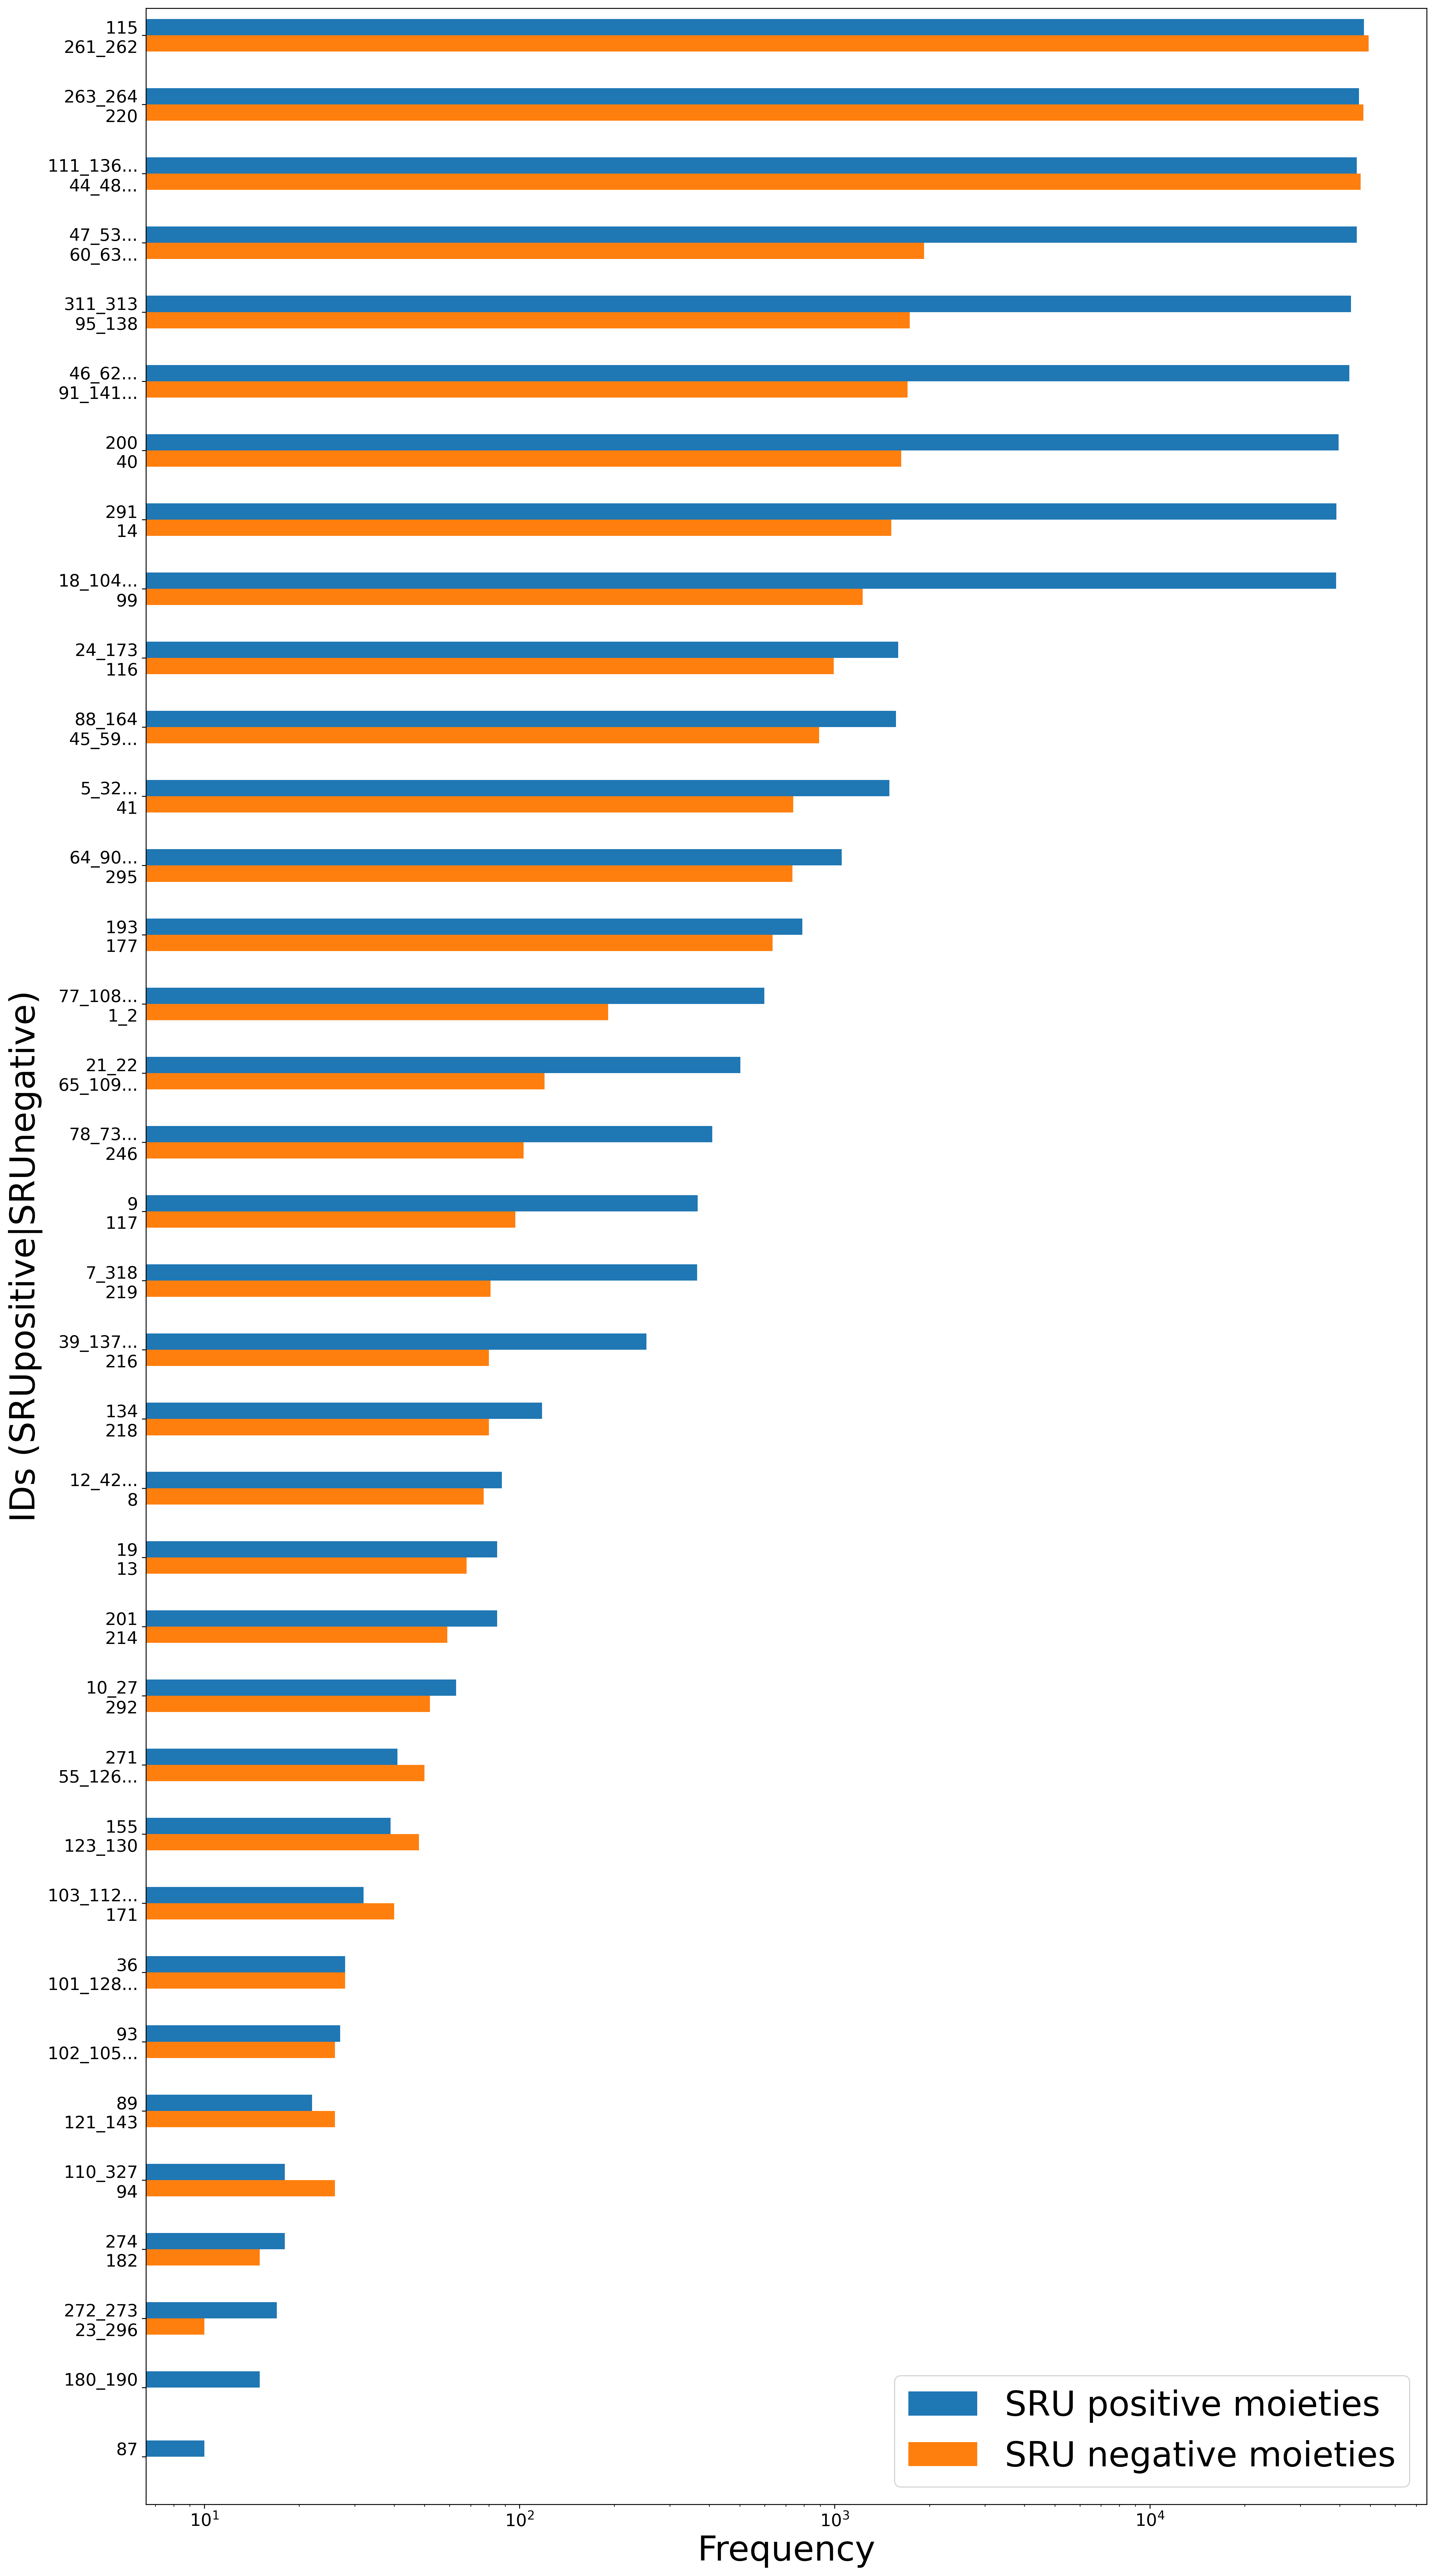

In [9]:
width = 1.2 #0.8
offset = 0.2
plt.rcParams.update({'font.size': 15}) #30
plt.rcParams.update({'lines.linewidth': 50}) 
fig, ax = plt.subplots(figsize=(20,40),dpi=300)

# Example data
ids_sru_positive = sru_positive_df.ID.values
ids_sru_negative = sru_negative_df.ID.values
y_pos = np.arange(len(ids_sru_negative)) * 5.1
frequencies_sru_positive = sru_positive_df.Frequency.values
frequencies_sru_negative = sru_negative_df.Frequency.values

ax.barh(y_pos-width, frequencies_sru_positive, height=width, align='edge', log=True)
ax.barh(y_pos, frequencies_sru_negative, height=width, align='edge', log=True)
ax.set_yticks(y_pos)
ax.set_yticklabels(ids_sru_positive+"\n"+ids_sru_negative)
ax.set_ylim(-2, 182)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Frequency', fontsize=30)
ax.set_ylabel('IDs (SRUpositive|SRUnegative)', fontsize=30)
#ax.set_title('Matches in COCONUT', fontsize=30)
ax.legend(['SRU positive moieties', 'SRU negative moieties'], loc='lower right', fontsize=30)
plt.show()

In [10]:
fig.savefig("output\Review_sugar_moieties.jpeg", 
            dpi = fig.dpi, bbox_inches = "tight")
fig.savefig("output\Review_sugar_moieties.png", 
            dpi = fig.dpi, bbox_inches = "tight")

In [16]:
img=Draw.MolsToGridImage(Chem.MolFromSmiles(sru_positive_df.SMILES.values),molsPerRow=4,subImgSize=(200,200),legends=[value for value in sru_positive_df.ID.values])    

TypeError: No registered converter was able to produce a C++ rvalue of type class std::basic_string<wchar_t,struct std::char_traits<wchar_t>,class std::allocator<wchar_t> > from this Python object of type numpy.ndarray